In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
w_shad = np.load('shadow-cdk2-14-15.npy').item()
w_prot = np.load('protocol-cdk2-14-15.npy').item()

In [3]:
w_shad.keys()

dict_keys([(0.5, 'OVRVO', 0), (0.5, 'OVRVO', 1), (0.5, 'RVOVR', 0), (0.5, 'RVOVR', 1), (0.5, 'VRORV', 0), (0.5, 'VRORV', 1), (1.0, 'OVRVO', 0), (1.0, 'OVRVO', 1), (1.0, 'RVOVR', 0), (1.0, 'RVOVR', 1), (1.0, 'VRORV', 0), (1.0, 'VRORV', 1), (1.5, 'OVRVO', 0), (1.5, 'OVRVO', 1), (1.5, 'RVOVR', 0), (1.5, 'RVOVR', 1), (1.5, 'VRORV', 0), (1.5, 'VRORV', 1), (2.0, 'OVRVO', 0), (2.0, 'OVRVO', 1), (2.0, 'RVOVR', 0), (2.0, 'RVOVR', 1), (2.0, 'VRORV', 0), (2.0, 'VRORV', 1), (2.5, 'OVRVO', 0), (2.5, 'OVRVO', 1), (2.5, 'RVOVR', 0), (2.5, 'RVOVR', 1), (2.5, 'VRORV', 0), (2.5, 'VRORV', 1), (3.0, 'OVRVO', 0), (3.0, 'OVRVO', 1), (3.0, 'RVOVR', 0), (3.0, 'RVOVR', 1), (3.0, 'VRORV', 0), (3.0, 'VRORV', 1), (3.5, 'OVRVO', 0), (3.5, 'OVRVO', 1), (3.5, 'RVOVR', 0), (3.5, 'RVOVR', 1), (3.5, 'VRORV', 0), (3.5, 'VRORV', 1), (4.0, 'OVRVO', 0), (4.0, 'OVRVO', 1), (4.0, 'RVOVR', 0), (4.0, 'RVOVR', 1), (4.0, 'VRORV', 0), (4.0, 'VRORV', 1)])

In [4]:
w_shad[(0.5, 'OVRVO', 0)]

array([1152.98075362, 1094.29734518, 1153.92941437, 1134.75009299,
       1049.62343208, 1004.72747147, 1025.2940356 , 1209.3795712 ,
       1189.15368983,  970.67272879, 1070.99094004, 1234.00103104,
       1119.01202428, 1152.89056704, 1126.72127595, 1144.47316677,
       1023.31073249, 1194.47933238, 1048.3293078 , 1297.29873289,
       1076.07202261, 1200.21792992, 1188.33221891, 1095.35387072,
       1109.74223576, 1062.06327613, 1128.55258885, 1114.55700821,
       1019.98192051, 1153.97387298, 1150.25346303, 1170.72550405,
       1181.96578896, 1160.37360399, 1053.66779358, 1181.11909471,
       1173.90237412, 1306.23630737, 1116.88678353, 1131.67941902,
       1291.03430578, 1174.04676644, 1181.29248898, 1297.23086567,
       1104.55314949, 1135.30475725, 1141.72915905, 1243.26790994,
       1222.35764437, 1278.42585   ,  981.35987378, 1018.86222386,
       1106.69108427, 1174.80018898, 1043.41349092, 1053.18437212,
       1030.2029389 ,  944.22595453, 1121.21972569, 1126.23568

In [5]:
integrator = 'OVRVO'
direction = 0

dts = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

distributions = []
for dt in dts:
    distributions.append(w_shad[(dt, integrator, direction)])

([], <a list of 0 Text yticklabel objects>)

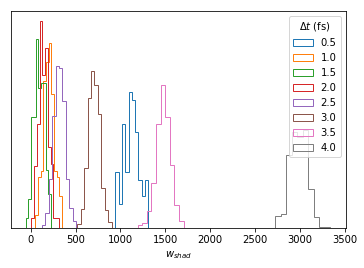

In [6]:
for i in range(len(dts)):
    plt.hist(distributions[i], label=str(dts[i]), histtype='step', normed=True)
plt.legend(loc='best', title=r'$\Delta t$ (fs)')
plt.xlabel(r'$w_{shad}$')
plt.yticks([])

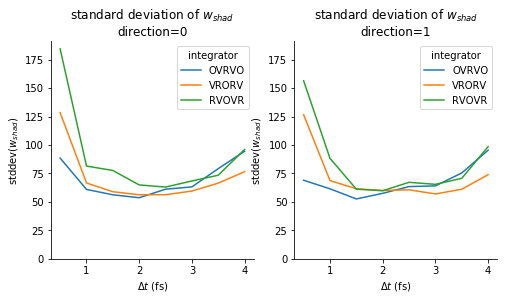

In [7]:
plt.figure(figsize=(8,4))
dts = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
integrators = ['OVRVO', 'VRORV', 'RVOVR']
ax = None
for direction in [0, 1]:
    ax = plt.subplot(1,2,1 + direction, sharey=ax)
    
    for integrator in integrators:
        samples = []
        for dt in dts:
            samples.append(w_shad[(dt, integrator, direction)])

        plt.plot(dts, list(map(np.std, samples)), label=integrator)

    plt.xlabel(r'$\Delta t$ (fs)')
    plt.ylabel(r'stddev($w_{shad}$)')
    plt.ylim(0,)
    plt.legend(loc='best', title='integrator')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.title(r'standard deviation of $w_{shad}$' + '\ndirection={}'.format(direction))
plt.savefig('stddev(w_shad).jpg', dpi=300, bbox_inches='tight')

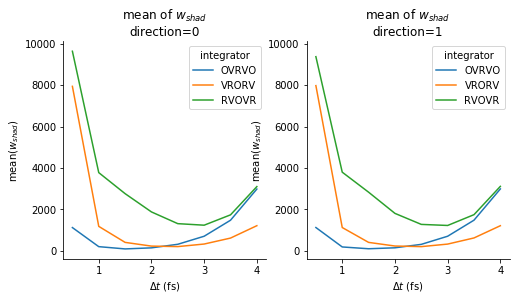

In [ ]:
plt.figure(figsize=(8,4))
ax = None
for direction in [0, 1]:
    ax = plt.subplot(1,2,1 + direction, sharey=ax)
    
    for integrator in integrators:
        samples = []
        for dt in dts:
            samples.append(w_shad[(dt, integrator, direction)])

        plt.plot(dts, list(map(np.mean, samples)), label=integrator)

    plt.xlabel(r'$\Delta t$ (fs)')
    plt.ylabel(r'mean($w_{shad}$)')
    #plt.ylim(0,)
    plt.legend(loc='best', title='integrator')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.title(r'mean of $w_{shad}$' + '\ndirection={}'.format(direction))
plt.savefig('mean(w_shad).jpg', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(8,4))
ax = None
for direction in [0, 1]:
    ax = plt.subplot(1,2,1 + direction, sharey=ax)
    
    for integrator in integrators:
        samples = []
        for dt in dts:
            samples.append(w_shad[(dt, integrator, direction)])

        plt.plot(dts, list(map(len, samples)), label=integrator)

    plt.xlabel(r'$\Delta t$ (fs)')
    plt.ylabel(r'len($w_{shad}$)')
    #plt.ylim(0,)
    plt.legend(loc='best', title='integrator')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.title(r'number of $w_{shad}$ samples' + '\ndirection={}'.format(direction))
plt.savefig('len(w_shad).jpg', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(8,4))
ax = None
for direction in [0, 1]:
    ax = plt.subplot(1,2,1 + direction, sharey=ax)
    
    for integrator in integrators:
        samples = []
        for dt in dts:
            samples.append(w_prot[(dt, integrator, direction)][-1])

        plt.plot(dts, list(map(np.std, samples)), label=integrator)

    plt.xlabel(r'$\Delta t$ (fs)')
    plt.ylabel(r'stddev($w_{prot}$)')
    plt.ylim(0,)
    plt.legend(loc='best', title='integrator')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.title(r'standard deviation of $w_{prot}$' + '\ndirection={}'.format(direction))
plt.savefig('stddev(w_prot).jpg', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(8,4))
ax = None
for direction in [0, 1]:
    ax = plt.subplot(1,2,1 + direction, sharey=ax)
    
    for integrator in integrators:
        samples = []
        for dt in dts:
            samples.append(w_prot[(dt, integrator, direction)][-1])

        plt.plot(dts, list(map(np.mean, samples)), label=integrator)

    plt.xlabel(r'$\Delta t$ (fs)')
    plt.ylabel(r'mean($w_{prot}$)')
    plt.ylim(0,)
    plt.legend(loc='best', title='integrator')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.title(r'mean of $w_{prot}$' + '\ndirection={}'.format(direction))
plt.savefig('mean(w_prot).jpg', dpi=300, bbox_inches='tight')